<a href="https://colab.research.google.com/github/Syleshkumar1996/Political_ideology_prediction/blob/main/Notebook_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Political ideology prediction through music preferences**






Importing the necessary libraries:

In [ ]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time
from google.colab import files
import io

Setting up the API connection:

In [ ]:
cid = ''
secret = ''
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

Uploading the dataset:

In [ ]:
uploaded=files.upload()

Saving Data.xlsx to Data.xlsx


In [ ]:
df1=pd.read_excel(io.BytesIO(uploaded['Data.xlsx']))
df1.head()

,Political affiliation,Politician,Playlist_link,Number_of_songs
0,Republican,Mike Lee,https://open.spotify.com/playlist/04yIrAVZvmrB...,215
1,Democrat,Ted Deutch,https://open.spotify.com/playlist/6GGjDCYZmRd8...,137
2,Democrat,Cory Booker,https://open.spotify.com/playlist/30MVFQwRsojT...,101
3,Democrat,Beto O'Rourke,https://open.spotify.com/playlist/2jKnc676Xmbm...,98
4,Republican,Blake Farenthold,https://open.spotify.com/playlist/02qnX97e2pt4...,71


Extracting the Playlist ID  from the playlist URL

In [ ]:
df1['playlist_id']=df1['Playlist_link'].str.slice(34,)
df1.head()

,Political affiliation,Politician,Playlist_link,Number_of_songs,playlist_id
0,Republican,Mike Lee,https://open.spotify.com/playlist/04yIrAVZvmrB...,215,04yIrAVZvmrBwQZGtOfkoo
1,Democrat,Ted Deutch,https://open.spotify.com/playlist/6GGjDCYZmRd8...,137,6GGjDCYZmRd8406rXn95rA
2,Democrat,Cory Booker,https://open.spotify.com/playlist/30MVFQwRsojT...,101,30MVFQwRsojTKmgVf2RQFw
3,Democrat,Beto O'Rourke,https://open.spotify.com/playlist/2jKnc676Xmbm...,98,2jKnc676XmbmgcYiRTnZa6
4,Republican,Blake Farenthold,https://open.spotify.com/playlist/02qnX97e2pt4...,71,02qnX97e2pt4wdKptGEGrX


Converting the dependant variable into binary format:

In [ ]:
df1['Political affiliation'].mask(df1['Political affiliation']=='Democrat',0,inplace=True)
df1['Political affiliation'].mask(df1['Political affiliation']=='Republican',1,inplace=True)
df1.head()

,Political affiliation,Politician,Playlist_link,Number_of_songs,playlist_id
0,1,Mike Lee,https://open.spotify.com/playlist/04yIrAVZvmrB...,215,04yIrAVZvmrBwQZGtOfkoo
1,0,Ted Deutch,https://open.spotify.com/playlist/6GGjDCYZmRd8...,137,6GGjDCYZmRd8406rXn95rA
2,0,Cory Booker,https://open.spotify.com/playlist/30MVFQwRsojT...,101,30MVFQwRsojTKmgVf2RQFw
3,0,Beto O'Rourke,https://open.spotify.com/playlist/2jKnc676Xmbm...,98,2jKnc676XmbmgcYiRTnZa6
4,1,Blake Farenthold,https://open.spotify.com/playlist/02qnX97e2pt4...,71,02qnX97e2pt4wdKptGEGrX


Removal of unneccesary datapoints:

In [ ]:
df1.drop(columns=['Politician','Playlist_link','Number_of_songs'],inplace=True)
df1.head()

,Political affiliation,playlist_id
0,1,04yIrAVZvmrBwQZGtOfkoo
1,0,6GGjDCYZmRd8406rXn95rA
2,0,30MVFQwRsojTKmgVf2RQFw
3,0,2jKnc676XmbmgcYiRTnZa6
4,1,02qnX97e2pt4wdKptGEGrX


Creation of an empty dataframe to store the variables related to each song:

In [ ]:
song_info_list = ["playlist_id","track_id","acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode", "speechiness","tempo","time_signature","valence"]
    
df2 = pd.DataFrame(columns = song_info_list)

A loop is designed to extract necessary information via the Spotify API

In [ ]:
for i in df1.index:
   
    playlist_id=df1.iloc[i,1]
    time.sleep(0.10)
    playlist_dict=sp.user_playlist_tracks("spotify", playlist_id)
    playlist = sp.user_playlist_tracks("spotify", playlist_id)["items"]
    while playlist_dict['next']:
      playlist_dict=sp.next(playlist_dict)
      playlist.extend(playlist_dict['items'])
 
    for j in playlist:
        
        song_info = {}
        
        song_info["playlist_id"] = playlist_id
        song_info["track_id"] = j["track"]["id"]
        
        
        song_audio_features = sp.audio_features(song_info["track_id"])[0]
        for k in song_info_list[2:]:
            song_info[k] = song_audio_features[k]
        
        
        song_df = pd.DataFrame(song_info, index = [0])
        df2 = pd.concat([df2, song_df], ignore_index = True)

In [ ]:
df2.head()

,playlist_id,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,04yIrAVZvmrBwQZGtOfkoo,51pQ7vY7WXzxskwloaeqyj,0.575000,0.346,478173,0.335,0.006740,7,0.1850,-12.453,1,0.0339,84.204,4,0.213
1,04yIrAVZvmrBwQZGtOfkoo,3MODES4TNtygekLl146Dxd,0.072000,0.468,263333,0.607,0.000852,9,0.2250,-11.367,1,0.0336,98.429,4,0.886
2,04yIrAVZvmrBwQZGtOfkoo,51pQ7vY7WXzxskwloaeqyj,0.575000,0.346,478173,0.335,0.006740,7,0.1850,-12.453,1,0.0339,84.204,4,0.213
3,04yIrAVZvmrBwQZGtOfkoo,3w2GGz0HjIu9OcWXINRFJR,0.000564,0.327,219800,0.895,0.015900,9,0.1040,-7.428,1,0.0367,169.390,4,0.898
4,04yIrAVZvmrBwQZGtOfkoo,55sjCMeQM26VxbNHhMtj2b,0.892000,0.495,211467,0.237,0.006380,2,0.0865,-17.701,1,0.0333,77.376,4,0.541


The extracted data is merged with the input dataset

In [ ]:
df3=pd.merge(df1,df2,on="playlist_id",how="inner")

In [ ]:
df3.head()

,Political affiliation,playlist_id,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,04yIrAVZvmrBwQZGtOfkoo,51pQ7vY7WXzxskwloaeqyj,0.575000,0.346,478173,0.335,0.006740,7,0.1850,-12.453,1,0.0339,84.204,4,0.213
1,1,04yIrAVZvmrBwQZGtOfkoo,3MODES4TNtygekLl146Dxd,0.072000,0.468,263333,0.607,0.000852,9,0.2250,-11.367,1,0.0336,98.429,4,0.886
2,1,04yIrAVZvmrBwQZGtOfkoo,51pQ7vY7WXzxskwloaeqyj,0.575000,0.346,478173,0.335,0.006740,7,0.1850,-12.453,1,0.0339,84.204,4,0.213
3,1,04yIrAVZvmrBwQZGtOfkoo,3w2GGz0HjIu9OcWXINRFJR,0.000564,0.327,219800,0.895,0.015900,9,0.1040,-7.428,1,0.0367,169.390,4,0.898
4,1,04yIrAVZvmrBwQZGtOfkoo,55sjCMeQM26VxbNHhMtj2b,0.892000,0.495,211467,0.237,0.006380,2,0.0865,-17.701,1,0.0333,77.376,4,0.541


Certain songs are repeated within a playlist Hence the duplicates are removed

In [ ]:
duplicate=df3[df3.duplicated()]
duplicate

,Political affiliation,playlist_id,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
2,1,04yIrAVZvmrBwQZGtOfkoo,51pQ7vY7WXzxskwloaeqyj,0.5750,0.346,478173,0.335,0.006740,7,0.1850,-12.453,1,0.0339,84.204,4,0.213
191,1,04yIrAVZvmrBwQZGtOfkoo,0gEyKnHvgkrkBM6fbeHdwK,0.0783,0.439,274707,0.434,0.000049,7,0.1400,-14.918,1,0.0265,94.845,4,0.204
532,0,2jKnc676XmbmgcYiRTnZa6,0hKRSZhUGEhKU6aNSPBACZ,0.2900,0.364,337413,0.457,0.000106,4,0.9220,-14.162,0,0.0675,163.219,4,0.175
533,0,2jKnc676XmbmgcYiRTnZa6,0xIuNHHcKI1JDuBPlSwzb1,0.0858,0.542,161227,0.618,0.000000,2,0.7720,-8.876,1,0.1390,121.849,3,0.930
534,0,2jKnc676XmbmgcYiRTnZa6,3LtOmWpTXLhilL5odoKysR,0.3130,0.632,168120,0.471,0.000005,0,0.0712,-7.887,1,0.0348,121.672,4,0.764
535,0,2jKnc676XmbmgcYiRTnZa6,3LtOmWpTXLhilL5odoKysR,0.3130,0.632,168120,0.471,0.000005,0,0.0712,-7.887,1,0.0348,121.672,4,0.764


In [ ]:
df3.drop_duplicates(ignore_index=True)
df3.head()

,Political affiliation,playlist_id,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,04yIrAVZvmrBwQZGtOfkoo,51pQ7vY7WXzxskwloaeqyj,0.575000,0.346,478173,0.335,0.006740,7,0.1850,-12.453,1,0.0339,84.204,4,0.213
1,1,04yIrAVZvmrBwQZGtOfkoo,3MODES4TNtygekLl146Dxd,0.072000,0.468,263333,0.607,0.000852,9,0.2250,-11.367,1,0.0336,98.429,4,0.886
2,1,04yIrAVZvmrBwQZGtOfkoo,51pQ7vY7WXzxskwloaeqyj,0.575000,0.346,478173,0.335,0.006740,7,0.1850,-12.453,1,0.0339,84.204,4,0.213
3,1,04yIrAVZvmrBwQZGtOfkoo,3w2GGz0HjIu9OcWXINRFJR,0.000564,0.327,219800,0.895,0.015900,9,0.1040,-7.428,1,0.0367,169.390,4,0.898
4,1,04yIrAVZvmrBwQZGtOfkoo,55sjCMeQM26VxbNHhMtj2b,0.892000,0.495,211467,0.237,0.006380,2,0.0865,-17.701,1,0.0333,77.376,4,0.541


There are no null values in the dataset.

In [ ]:
df3.isnull().sum()

Political affiliation    0
playlist_id              0
track_id                 0
acousticness             0
danceability             0
duration_ms              0
energy                   0
instrumentalness         0
key                      0
liveness                 0
loudness                 0
mode                     0
speechiness              0
tempo                    0
time_signature           0
valence                  0
dtype: int64

The  datatype of certain columns are changed to the required format

In [ ]:
df3.dtypes

Political affiliation     object
playlist_id               object
track_id                  object
acousticness             float64
danceability             float64
duration_ms               object
energy                   float64
instrumentalness         float64
key                       object
liveness                 float64
loudness                 float64
mode                      object
speechiness              float64
tempo                    float64
time_signature            object
valence                  float64
dtype: object

In [ ]:
df3[['Political affiliation','duration_ms','key','mode','time_signature']]=df3[['Political affiliation','duration_ms','key','mode','time_signature']].apply(pd.to_numeric,downcast='float')

In [ ]:
df3.dtypes

Political affiliation    float32
playlist_id               object
track_id                  object
acousticness             float64
danceability             float64
duration_ms              float32
energy                   float64
instrumentalness         float64
key                      float32
liveness                 float64
loudness                 float64
mode                     float32
speechiness              float64
tempo                    float64
time_signature           float32
valence                  float64
dtype: object

Correlation matrix is computed to analyse the relationship between the independant variables. Since none of the independant variables are highly correlated, all the variables are considered for model building.

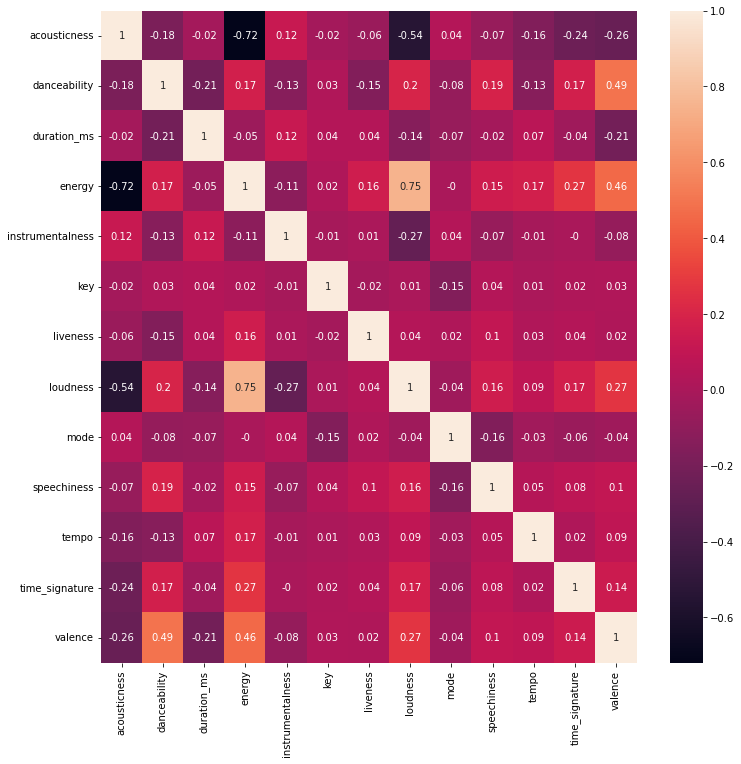

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix=(df3.iloc[:,3:]).corr().round(2)
plt.figure(figsize=(12,12)) 
sns.heatmap(correlation_matrix,annot=True)
plt.show()

Logistic regression is used to compute the dependant variable.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']],df3['Political affiliation'], test_size=0.2,shuffle = False)

In [ ]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8109965635738832